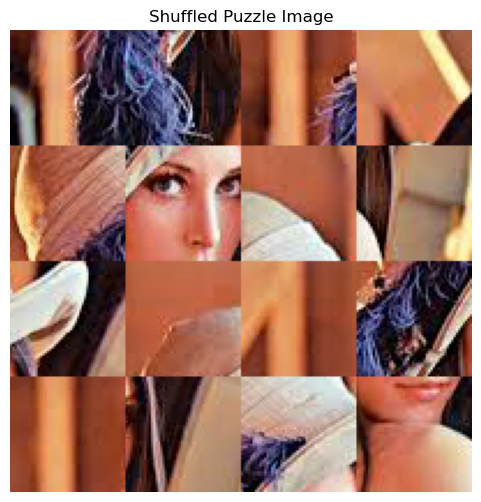

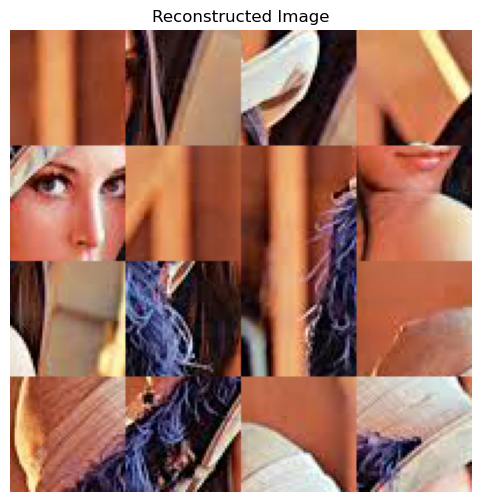

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random

# Step 1: Load the image and convert it to a NumPy array
img = io.imread('images.jpg')  # Replace with your image path
h, w, c = img.shape

# Step 2: Define the block size
block_size = 50  # Size of the puzzle pieces (blocks)

# Ensure the image dimensions are divisible by block_size
h = (h // block_size) * block_size  # Adjust height to be divisible by block_size
w = (w // block_size) * block_size  # Adjust width to be divisible by block_size

# Crop the image to fit the new dimensions
img = img[:h, :w]

# Step 3: Divide the image into blocks of equal size
blocks = []
indices = []  # Store the original indices of the blocks

# Loop through the image to extract blocks and keep track of their positions
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        block = img[i:i+block_size, j:j+block_size]
        blocks.append(block)
        indices.append((i // block_size, j // block_size))  # Store the block's original position

# Step 4: Shuffle the blocks by randomly permuting the indices
shuffled_indices = list(range(len(blocks)))
random.shuffle(shuffled_indices)

# Reorder the blocks using the shuffled indices
shuffled_blocks = [blocks[i] for i in shuffled_indices]

# Step 5: Display the shuffled blocks as a puzzle by stitching them together
shuffled_img = np.zeros_like(img)

block_idx = 0
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        shuffled_img[i:i+block_size, j:j+block_size] = shuffled_blocks[block_idx]
        block_idx += 1

# Display shuffled image (the puzzle)
plt.figure(figsize=(6,6))
plt.imshow(shuffled_img)
plt.title('Shuffled Puzzle Image')
plt.axis('off')
plt.show()

# Step 6: Reconstruct the original image by using the inverse of the shuffled indices
reconstructed_img = np.zeros_like(img)

# Reconstruct the image by placing the blocks in their original order
for idx, original_pos in zip(shuffled_indices, indices):
    block = shuffled_blocks[idx]
    i, j = original_pos
    reconstructed_img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = block

# Display the reconstructed image
plt.figure(figsize=(6,6))
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# Optionally save the shuffled and reconstructed images
# io.imsave('shuffled_image.jpg', shuffled_img)
# io.imsave('reconstructed_image.jpg', reconstructed_img)


In [5]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 325.1 kB/s eta 0:02:02
   ---------------------------------------- 0.1/39.5 MB 290.5 kB/s eta 0:02:16
   ---------------------------------------- 0.1/39.5 MB 416.7 kB/s eta 0:01:35
   ---------------------------------------- 0.1/39.5 MB 420.8 kB/s eta 0:01:34
   ---------------------------------------- 0.1/39.5 MB 413.7 kB/s eta 0:01:36
   ---------------------------------------- 0.2/39.5 MB 437.1 kB/s eta 0:01:30
   ---------------------------------------- 0.2/39.5 MB 426.7 kB/s eta 0:01:33
   ---------------------------------------- 0.2/39.5 MB 454.0 kB/s eta 0:01:27
   ---------------------------------------- 0.2/39.5 MB 452.1 kB/s eta 0:01:27

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load the image

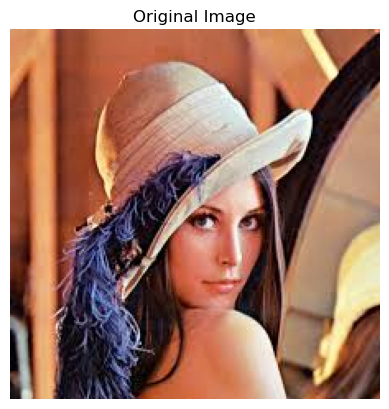

In [13]:
image = cv2.imread('images.jpg')

# Convert the image to RGB (OpenCV loads images in BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Define the size of the blocks (e.g., 100x100 pixels)

In [15]:
block_size = 100

# Get the dimensions of the image
height, width, channels = image.shape

# Calculate the number of blocks in each dimension
num_blocks_height = height // block_size
num_blocks_width = width // block_size

# Crop the image to make it divisible by the block size
cropped_image = image[:num_blocks_height * block_size, :num_blocks_width * block_size]

# Split the image into blocks
blocks = []
for i in range(num_blocks_height):
    for j in range(num_blocks_width):
        block = cropped_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size]
        blocks.append(block)

# Convert the list of blocks to a NumPy array
blocks = np.array(blocks)

# Generate a random permutation of the block indices

In [17]:
indices = np.arange(len(blocks))
shuffled_indices = shuffle(indices)

# Shuffle the blocks using the shuffled indices
shuffled_blocks = blocks[shuffled_indices]

# Create an empty image to store the shuffled blocks

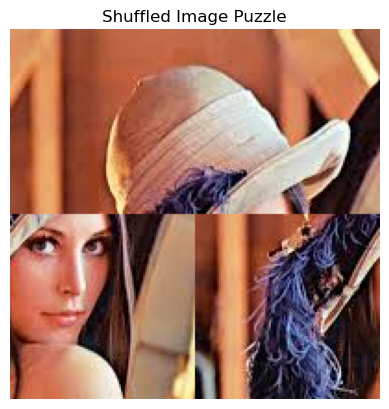

In [23]:
shuffled_image = np.zeros_like(cropped_image)

# Stitch the shuffled blocks back together
for idx, block_idx in enumerate(shuffled_indices):
    i = idx // num_blocks_width
    j = idx % num_blocks_width
    shuffled_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = blocks[block_idx]

# Display the shuffled image
plt.imshow(shuffled_image)
plt.title("Shuffled Image Puzzle")
plt.axis('off')
plt.show()

# Create an empty image to store the reconstructed blocks

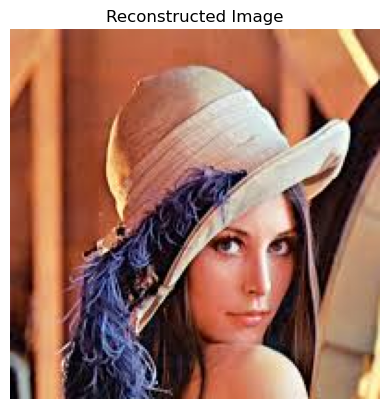

In [26]:
reconstructed_image = np.zeros_like(cropped_image)

# Unshuffle the blocks using the inverse permutation
for idx, block_idx in enumerate(shuffled_indices):
    i = block_idx // num_blocks_width
    j = block_idx % num_blocks_width
    reconstructed_image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = shuffled_blocks[idx]

# Display the reconstructed image
plt.imshow(reconstructed_image)
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

# Save the shuffled image

In [42]:
cv2.imwrite('shuffled_puzzle.jpg', cv2.cvtColor(shuffled_image, cv2.COLOR_RGB2BGR))

# Save the reconstructed image
cv2.imwrite('reconstructed_image.jpg', cv2.cvtColor(reconstructed_image, cv2.COLOR_RGB2BGR))

True